In [11]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [12]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


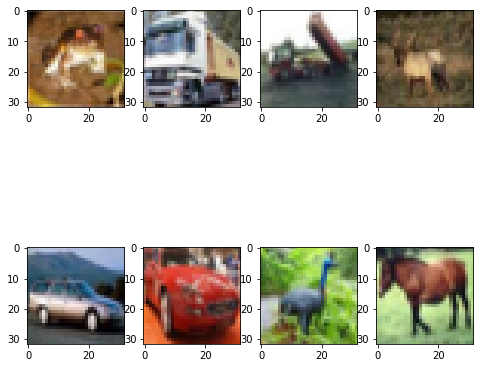

In [13]:
plt.figure(figsize=(8, 8))
for i, img in enumerate(x_train[:8]):
    plt.subplot(2,4,i+1)
    plt.imshow(x_train[i])
plt.show()

In [14]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [15]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [16]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(16, 3, activation='relu', padding='same', input_shape = (32, 32, 3)))
model.add(keras.layers.Conv2D(16, 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPool2D())

model.add(keras.layers.Conv2D(32, 3, activation='relu', padding='same'))
model.add(keras.layers.Conv2D(32, 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPool2D())

model.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
model.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPool2D())

model.add(keras.layers.Conv2D(128, 3, activation='relu', padding='same'))
model.add(keras.layers.Conv2D(128, 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPool2D())

model.add(keras.layers.Conv2D(256, 3, activation='relu', padding='same'))
model.add(keras.layers.Conv2D(256, 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPool2D())


model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 64)         

In [17]:
loss = tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adam()
metrics = tf.keras.metrics.categorical_accuracy

model.compile(loss = loss, optimizer = optimizer, metrics = [metrics])

In [ ]:
hist = model.fit(x_train, y_train, batch_size=100, epochs=5, validation_split=0.2, shuffle=True)

Epoch 1/5
 76/400 [====>.........................] - ETA: 2:42 - loss: 2.2197 - categorical_accuracy: 0.1486

In [ ]:
loss, acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.0883 - categorical_accuracy: 0.6200


In [ ]:
print(model.predict(x_test[99:100]))
print(y_test[99])

[[4.2686905e-03 3.9778728e-04 1.6192337e-02 2.1299219e-01 4.6139169e-02
  4.1710019e-02 3.3016398e-03 6.6903752e-01 6.4574357e-05 5.8960509e-03]]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
